# Lecture 2. Text processing and file input output. 

In [ ]:
# This is for our DataFrames
import pandas as pd

# This package allows us to parse json
import json

# This package allows us to take a list in json and turn it into a DataFrame
from pandas.io.json import json_normalize

# This package allows us to download data from the web
import urllib

# This is a package called "Beautiful Soup" that parses webpages/XML and it available as an object
import bs4

# This package stops time so you can work on your assignment
# Just kidding, it allows you to pause a program
import time

# This package allows you to use plt to plot data
import matplotlib.pyplot as plt

# This package allows you to use regular expressions
import re

# This magic command places image output in the workbook
# If you want to save a figure to your computer use plt.savefig(PATH)
%pylab inline


## Review from last week

In python we can create data structures that we can use for managing data, filtering it and combining it in new ways. We introduced the **Series** data structure that has properties of both lists (ordered, indexable) and dictionaries (queryable by key). We also introduced the **DataFrame** which is like a collection of Series as columns, with rows as cases. 

Basic file manipulation
-----------------------

File manipulation consists of creating file openers and then working with those openers. The openers take two arguments. The first is the path to the file. If there is no path given beyond the file name, it will assume that the file is in the same directory as the code. 

    fileopener = open("path","r/w/a")

The second argument is either 'r', 'w' or 'a'. These respectively refer to read, write and append. Once you have a file opener you can either read the file or write the file. 

**Reading from a file**

When reading a file, you can either read the entire contents with the read() command:

    entire_file = fileopener.read()
    
You can also read line by line using an iterator. 

    for line in fileopener:
        print(line)

Remember! When you do this, each line will be returned. These lines typically have a new line character at the end of the line. So when you print it, you will print a space in between these lines. The way to get rid of that character is to "strip" it from the text:

    for line in fileopener:
        print(line.strip())

This will always start from the cursor. So if you have already read the file, you will either have to re-open it or set the cursor back to the original position. 

    fileopener.read()
    fileopener.seek(0)
    for line in fileopener:
         print(line)

When you are done you should close the file:

    fileopener.close()
    
** Writing to a File **

Writing to a file involves again creating an opener. The command to write to a file is:


    fileopener.write(STRING)
     
When you are done writing to the file it is also a good idea to close the file. Again, it is:

    file.close()

This closing is less important for reading than it is for writing. Why? Because writing to the file doesn't always ensure that the physical harddrive is written. By closing the file, it will 'flush' the contents of the file to the hard disk. If in the case you think it's important to periodically flush the data to the hard disk this is possible, too:

    fileopener.flush()

WARNING! Creating a writable file open actually creates a pointer to a file on the computer using the name of the file. This is especially important to understand because you can run the risk of destroying another file with the same name. This is what is called "clobbering". When you work in a word processor and try to save a file with the same name the computer will ask you 'file name already exists. are you sure?' or something to that effect. Python will not give such a warning. So please be careful with the names of your file openers.



In [95]:
txt = "hello world"
FILENAME = "example_clobber.txt"
fileout =  open(FILENAME, "w")
fileout.write(txt)
fileout.close()

filein = open(FILENAME)
print(filein.read())

filein.close()

fileout = open(FILENAME, 'w')

hello world


In [98]:

#############################################
# FILE MANIPULATION EXAMPLES 

NAME = "EXAMPLE_FILE"

# Write a file 
fileout = open("%s_testOut.txt" % (NAME),"w")
fileout.write("yes!\n"*10)
fileout.close()

# Read a file 
filein = open("%s_testOut.txt" % (NAME), 'r')
print("Begin printing in full")

print(filein.read())

print("Begin printing line by line")

filein.seek(0) # this resets the cursor to the beginning of the file. 

for count,line in enumerate(filein):
    print(count,":",line.strip())
    
# for line in filein: 
#     print(line)
    
filein.close()
print("***File closed***")

Begin printing in full
yes!
yes!
yes!
yes!
yes!
yes!
yes!
yes!
yes!
yes!

Begin printing line by line
0 : yes!
1 : yes!
2 : yes!
3 : yes!
4 : yes!
5 : yes!
6 : yes!
7 : yes!
8 : yes!
9 : yes!
***File closed***


In [ ]:
# Append a file 
fileout = open("%s_testOut.txt" % NAME,"a")
fileout.write("No!")
fileout.close()

filein = open("%s_testOut.txt" % NAME,"r")

for count,line in enumerate(filein):
    print(count,":",line)

filein.close()

Writing bytestrings and serializing files
-----------------------------------------

Sometimes you want to store some python objects exactly as the program is using them. This is called serialization in programming parlance. In python, this is called "pickling", as in the way one preserves things by putting them in jars with spices. In the simples instance, you merely want to call the "dump" or "load" methods. However, with Python 3, this works slightly differently than before. Now instead of writing the text as you read it, you have to write it as a stream of bytes. Go to a text editor and open a .jpeg or a .mp3 and you will see what a bytestring looks like. They are pretty unintelligible to humans but they work just fine for the computer. It is often a good idea to pickle some work if you are on a server and concerned what would happen if the program failed. 

To create a file opener as a bytestring, you have to append 'b' to the read or write argument

    open(PATH, 'wb') 
    
So the resulting code to open a file for pickling is

    pickle.dump(PYTHON_OBJECT, open(PATH, 'wb')
    
To read from the file (and typically assugn it to a variable:

    new_object = pickle.load(open(PATH, 'rb')

In [100]:
import pickle
# Write a pickle 
x = ["best","script","ever"]
y = {"comic book guy": "best . script . ever."}

z = (x,y)

pickle.dump(z,open("testPickle.pkl",'wb'))

new_z = pickle.load(open("testPickle.pkl",'rb'))
print(new_z)

(['best', 'script', 'ever'], {'comic book guy': 'best . script . ever.'})


# JSON

JSON stands for javascript object notation. It is a common lightweight form for data collection. We can see json on the web really easily. Just navigate to reddit, as in one of the nicer reddits, such as www.reddit.com/aww then append .json to the end of the URL. See there! It's basically just lists and dictionaries. You can load json data with 

~~~
import json

datastructure = json.loads(THE_DATA)
~~~

Then you can just query it as a series of nested lists and dictionaries. You can also print this data in a nice readable format (called pretty printing) in the following way: 

~~~
json.dumps(THE_DATA, indent=4) 
~~~

There are nicer ways to pretty print. Let's look at json from Reddit pretty printed. Open a browser window and head to:

https://jsonformatter.curiousconcept.com 

In there type: 

http://reddit.com/r/aww.json 

Notice how you can collapse and expand the json file. We will use this to navigate through the file then download it for processing. 

In [101]:
# Here's an example snippet. 
# We are going to download from the aww subreddit, then use json_normalize to stick it right in a DataFrame
# 1.
SUBREDDIT = "aww"
URL = "http://www.reddit.com/r/%s.json" % SUBREDDIT

# URL queries are preceded by a header. Your browser has a header, too. 
# Check: https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending
# Part of that header is the "user agent" string. Mine is: 
# Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.89 Safari/537.36 OPR/49.0.2725.39
# Reddit expects a string other than the python default. 
# You should alter it to be unique to you. 
# 1/0 # DELETE ME AFTER YOU'VE CHANGED THE HEADER
# 2. 
req = urllib.request.Request( URL, headers={'User-Agent': 'OII class 2018.1/Hogan'})

# IF you make repeated queries to Reddit, you must pause between them for a minimum of three seconds. 
# This snippet (time.sleep(3)) will do that for you, you just have to "import time" 
# time.sleep(4)
# 3. 
infile = urllib.request.urlopen(req)

# Here THE_DATA is we read the result and decode it. 
# 4. 
redditData = json.loads(infile.read().decode('utf8'))

# We we just say take the JSON and make a table. 
# 5. 
rtable = json_normalize(redditData["data"]["children"])
rtable

,data.approved_at_utc,data.approved_by,data.archived,data.author,data.author_flair_css_class,data.author_flair_text,data.banned_at_utc,data.banned_by,data.brand_safe,data.can_gild,...,data.thumbnail_height,data.thumbnail_width,data.title,data.ups,data.url,data.user_reports,data.view_count,data.visited,data.whitelist_status,kind
0,None,None,False,N8theGr8,None,None,None,None,True,False,...,NaN,NaN,Bestof /r/Aww 2017 voting thread!,237,https://www.reddit.com/r/aww/comments/7p8195/b...,[],None,False,all_ads,t3
1,None,None,False,TooShiftyForYou,None,None,None,None,True,False,...,140.0,140.0,At the shelter vs. 30 minutes after being adopted,91771,https://i.imgur.com/ue1KUpS.gifv,[],None,False,all_ads,t3
2,None,None,False,GetMammt,None,None,None,None,True,False,...,140.0,140.0,A sweet guy on an airplane,32739,https://i.redd.it/pdltre3u5ac01.jpg,[],None,False,all_ads,t3
3,None,None,False,CaptainFun_,None,None,None,None,True,False,...,140.0,140.0,Been riding shotgun for 14 years,7451,https://i.redd.it/jim66235j9c01.jpg,[],None,False,all_ads,t3
4,None,None,False,morris_alonso,None,None,None,None,True,False,...,140.0,140.0,Best doggy daycare photo ever taken,4822,https://i.imgur.com/ouMo1GU.jpg,[],None,False,all_ads,t3
5,None,None,False,jordanthelamb,None,None,None,None,True,False,...,140.0,140.0,Exactly one year apart! Still got his favourit...,454,https://i.redd.it/l9mz6rq9ycc01.jpg,[],None,False,all_ads,t3
6,None,None,False,antonmuhin,None,None,None,None,True,False,...,78.0,140.0,An A for effort,8531,https://i.imgur.com/DWJSjtS.gifv,[],None,False,all_ads,t3
7,None,None,False,bobsquad,None,None,None,None,True,False,...,140.0,140.0,This is why I am late for work every day...,859,https://i.redd.it/gcyz3qw9wbc01.jpg,[],None,False,all_ads,t3
8,None,None,False,natsdorf,None,None,None,None,True,False,...,140.0,140.0,Falling asleep.,120323,https://i.imgur.com/8srChE2.gifv,[],None,False,all_ads,t3
9,None,None,False,victor144p,None,None,None,None,True,False,...,140.0,140.0,"Me for the last 20 years: Mum, can we get a ca...",195,https://i.redd.it/zg2xo8wm1ec01.jpg,[],None,False,all_ads,t3


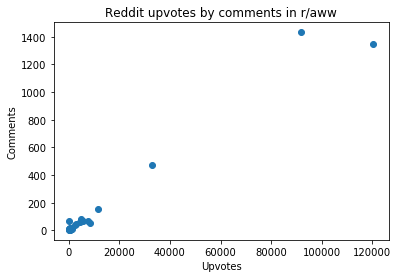

In [104]:
# When we have a DataFrame with at least two numerical columns, we can 
# plot it as a scatter plot. 
plt.scatter(rtable['data.ups'],rtable['data.num_comments'])

# We can add a label to the x-axis, the y-axis and the entire table. 
plt.xlabel('Upvotes')
plt.ylabel('Comments')
plt.title('Reddit upvotes by comments in r/%s' % subreddit)

plt.savefig("test.png")
plt.show()

XML. Navigating nested mark-up language
------------------------------------------

Both XML and HTML are examples of mark-up **languages** with a DOM tree. That is the documents follow a hierarchical structure and use mark-up tags to indicate which part of the structure you are in. The tags that denote the sturcture are in brackets. Open tags have a word (and some options), closing tags have the same word but with a / in front of it. Here is a basic HTML document

    <html>
        <head>
            <title> 
                This is the title! 
            </title>
        </head>
        <body>
            This is a webpage!
        </body>
    </html>

There are a number of programs that will convert a raw HTML or XML document into a python object that can be navigated. In my opinion, one of the nicest is the package "BeautifulSoup". It takes a bit of getting used to, but it will be of significant help. We can start by downloading an HTML or XML document and then parsing it. The Anaconda package should have beautifulsoup embedded.





In [105]:
# You can set this Wikipage to be any string that has a wikipedia page.
WIKIPAGE = "United Kingdom"

# Here we use urllib.parse.quote to turn spaces and special characters into
# the characters needed for an html string. So for example spaces become %20
URL = "http://en.wikipedia.org/wiki/Special:Export/%s" % urllib.parse.quote(WIKIPAGE)

# View the output here to see how quote strings get formatted. 
# You don't need to remember the codes, just that you typically need to "quote" before
# requesting from a browser. 
EXAMPLE = "Here are some quoted strings:\n!_@_#_$_%_^_&_*_(_)_-_=_+_/_?" 
qEXAMPLE = urllib.parse.quote(EXAMPLE)
print(EXAMPLE,"\n\n",qEXAMPLE)

print(URL,"\n")
# Let's look at this page in an XML browser. Copy and paste it into your browser. 

Here are some quoted strings:
!_@_#_$_%_^_&_*_(_)_-_=_+_/_? 

 Here%20are%20some%20quoted%20strings%3A%0A%21_%40_%23_%24_%25_%5E_%26_%2A_%28_%29_-_%3D_%2B_/_%3F
http://en.wikipedia.org/wiki/Special:Export/United%20Kingdom 



In [109]:
# Again, don't forget the header! 
req = urllib.request.Request( URL, headers={'User-Agent': 'OII class 2017.1/Hogan'})

# This is the data we receive by opening the URL. But it's not the file, it's just a pointer. 
infile = urllib.request.urlopen(req)

wikitext = infile.read()
# print(wikitext)
# print("#######\n\n\n\n\n######\n")
# print(wikitext.decode('utf8'))

# This does a lot of things. 
# infile.read().decode('utf8') >> reads the page but assumes the page is unicode, not plain ASCII
# soup = bs4.BeautifulSoup(TEXT, features="xml") >> this converts the text to a "soup" that can be queried.
#                                                   By saying features="xml", the soup knows how to parse it. 
#
soup = bs4.BeautifulSoup(wikitext.decode('utf8'), "lxml")

text_to_parse = soup.mediawiki.page.text

# print(text_to_parse)

You might be wondering how I know that it was:

    mediawiki.page.text
    
As we as up above:

    mediawiki.page.revision.id

There are two ways to learn this, the hard way and the harder way. The hard way is to just look at the raw XML and fumble around printing through the tree until you find the node that you're looking for. The "harder" way is to navigate through the page using the tree structure that BeautifulSoup builds. The latter way is pretty darn hard without guidance from the document itself. 

In [113]:
for i in soup.children: print(i.name)

html


In [111]:
for i in soup.mediawiki.children: print(i.name)

None
siteinfo
None
page
None


In [114]:
for i in soup.mediawiki.page.children: print(i.name)

None
title
None
ns
None
id
None
revision
None


In [115]:
print(soup.mediawiki.page.text)


United Kingdom
0
31717

822438523
822409819
2018-01-26T11:07:19Z

Whizz40
19372301


/* Science and technology */ c/e
wikitext
text/x-wiki
{{About-distinguish2|the country|[[Great Britain]], its largest island whose name is also loosely applied to the whole country}}
{{Redirect|UK|other uses of "UK"|UK (disambiguation)|other uses of "United Kingdom"|United Kingdom (disambiguation)}}
{{pp-semi-indef}}
{{pp-move-indef}}
{{Use British English|date=April 2012}}
{{Use dmy dates|date=August 2017}}
{{Infobox country
| common_name = United Kingdom
| linking_name = the United Kingdom<!--Note: "the" required here as this entry used to create wikilinks-->
| name = {{collapsible list
  | titlestyle = background:transparent;line-height:normal;font-size:84%;
  | title = {{resize|1.25em|United Kingdom of Great<br/> Britain and Northern Ireland}}
  | {{Infobox |subbox=yes |bodystyle=font-size:76%;font-weight:normal;
  <!--Anglo-->
   | rowclass1 = mergedrow |label1=[[Scots language|Scots]]: |data1={{

Part 2. Basic Text Scraping
---------------------------

Basic text scraping is the practice of taking some data and cleaning it in such a way that it can be used for other programs. Below are a series of excercises designed to help you understand the fundamentals of text processing. In particular, we will focus on the process of handling whitespace. This will involve using several additional files that should be uploaded to your workspace. 

1. Cleaning up by line breaks. 
2. Splitting text by space. 
3. Finding specific words and characters. 
4. Converting from one character set to another character sets.



**Part 2.1 - Stripping characters.**

Below we will take a file, read it, print it and then get rid of the return characters. Please pay attention to the line-breaks when the file is being printed. 

In [117]:
with open("example_lines.txt") as file:
    for i in file:
        print(i.strip())

Testing Line 1
Exploring Line 2
Line 3 over here!
What? You wanted line 4?
No, I expected the fifth line
I think you spelled line 6 wrong
Line 7 here: Forget it.
I'm the troublemaker! (Line 8 hehehe)
Dr. Hogan thinks I'm line 9 :P

Line 11 being difficult here.


**Cleaning up the lines**
Did you notice that each of the lines has a space in between them? This is because we printed:

    "Testing Line 1\n"
    
And this is becuase when python reads the file it does it line by line. It splits the file at the new line character but keeps that character in the string when it returns the string. To get rid of these new line characters we would **strip()** the whitespace from the ends of the string.

In [118]:
with open("example_lines.txt") as file:
    for i in file:
        print(i.strip())

Testing Line 1
Exploring Line 2
Line 3 over here!
What? You wanted line 4?
No, I expected the fifth line
I think you spelled line 6 wrong
Line 7 here: Forget it.
I'm the troublemaker! (Line 8 hehehe)
Dr. Hogan thinks I'm line 9 :P

Line 11 being difficult here.


In [123]:
words = []
with open("example_lines.txt") as file:
    for i in file:
        words += i.split()
        
# print(words)

wordseries = pd.Series(words)
display(wordseries.value_counts())
for i in list(wordseries.value_counts()[wordseries.value_counts() > 1].index):
    print(i)

Line             5
line             4
the              2
I'm              2
I                2
you              1
You              1
expected         1
8                1
:P               1
over             1
2                1
difficult        1
9                1
6                1
here!            1
fifth            1
hehehe)          1
4?               1
Exploring        1
here.            1
(Line            1
thinks           1
No,              1
7                1
Dr.              1
What?            1
troublemaker!    1
being            1
1                1
spelled          1
wanted           1
Testing          1
here:            1
3                1
wrong            1
11               1
Forget           1
think            1
Hogan            1
it.              1
dtype: int64

Line
line
the
I'm
I


**Word frequency**

So, as we can see above, we have all sorts of issues with words. The word 'line' is there in upper and lower case, sometimes the text uses numbers, sometimes it has periods in there. We can do all sorts of things to these data to  clean them. 

In [124]:
word_dict = {}
with open("example_lines.txt") as file:
    for i in file:
        words = i.split()
        for j in words:
            j = j.lower() # all words are now lower case

            try: 
                if not j[-1].isalpha(): j = j[:-1] # non-alpha suffix
                if not j[0].isalpha(): j = j[1:] # non-alpha prefix
                if len(j) <= 1: continue # empty strings

            except IndexError:
                    continue
                
            # Once cleaned, we can then add the words to a dictionary 
            # The word will be the 'key' and the frequency will be the 'value'
            if j in word_dict: word_dict[j] += 1
            else: word_dict[j] = 1

print(pd.Series(word_dict))

being            1
difficult        1
dr               1
expected         1
exploring        1
fifth            1
forget           1
hehehe           1
here             3
hogan            1
i'm              2
it               1
line            10
no               1
over             1
spelled          1
testing          1
the              2
think            1
thinks           1
troublemaker     1
wanted           1
what             1
wrong            1
you              2
dtype: int64


1     20
2      3
10     1
3      1
Name: Count, dtype: int64


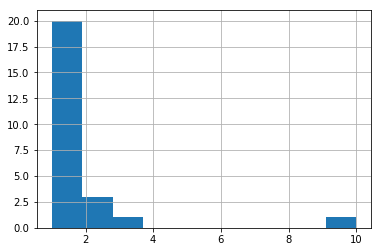

In [126]:
data = pd.Series(word_dict,name="Count")
print(data.value_counts())

data.hist()

Part 3. Simple regular expressions
--------------------------------

"Regular expressions" are pieces of text that can be expressed in a regular form even if the characters are different. For example, when you encounter a URL on a webpage and right click on it, the browser knows that this is a URL and asks "open link in new tab". It does not need to know every URL, just what URLs are supposed to look like (that is they start with "HTTP://" or "HTTPS://"). 

In [127]:
import re 

example_text = "1234\t3333\t10000\t1,500,442\t3.14"
print(example_text)

1234	3333	10000	1,500,442	3.14


In [128]:
# Just find the numbers
reg01 = re.compile("[0-9]")
print(reg01.findall(example_text))

['1', '2', '3', '4', '3', '3', '3', '3', '1', '0', '0', '0', '0', '1', '5', '0', '0', '4', '4', '2', '3', '1', '4']


In [129]:
# Just find the numbers
reg01 = re.compile("walk[\s]*")
print(reg01.findall(example_text))

['1234', '', '3333', '', '10000', '', '1', '', '500', '', '442', '', '3', '', '14', '']


In [130]:
# Hmm...it seems * matches 0 or more instances 
reg01 = re.compile("[0-9]+")
print(reg01.findall(example_text))

['1234', '3333', '10000', '1', '500', '442', '3', '14']


In [133]:
# Let's deal with those commas
reg01 = re.compile("[\d,.]+")
print(reg01.findall(example_text))

['1234', '3333', '10000', '1,500,442', '3.14']


As you can see from the above examples, working with regexs involve compiling a 'regular expression' and then applying that to text. Obviously, we could have just split on the tab character in this particular instance, but it's the logic of specifying regexs that's important, such as saying "all digits" or "one or more digits plus a comma." In the parentheses for the regular expression we can either ask for 0,1,n or a predetermined number of characters. The characters can be in a range, such as 0-9 or a-z. But we can also use escape codes for the characters. See below for examples of regexs with text.  

Also, as a hint, if you forgot about using the **help()** command 

In [134]:
new_string = example_text.replace(",","")
print("Old string: ", example_text)
print("New string: ", new_string)

Old string:  1234	3333	10000	1,500,442	3.14
New string:  1234	3333	10000	1500442	3.14


In [135]:
example_text = "😱 hello fellow kids, ur 2edgy4me 😝😝😝; you're like 3edgy5me. " + \
                "Yh, I replaced the 2 with a 3.\nI'm that edgy 😈."
print(example_text)

😱 hello fellow kids, ur 2edgy4me 😝😝😝; you're like 3edgy5me. Yh, I replaced the 2 with a 3.
I'm that edgy 😈.


In [136]:
reg02 = re.compile("[a-z]+")
print(reg02.findall(example_text))

['hello', 'fellow', 'kids', 'ur', 'edgy', 'me', 'you', 're', 'like', 'edgy', 'me', 'h', 'replaced', 'the', 'with', 'a', 'm', 'that', 'edgy']


In [139]:
reg02 = re.compile("\S+")
print(reg02.findall(example_text))

['😱', 'hello', 'fellow', 'kids,', 'ur', '2edgy4me', '😝😝😝;', "you're", 'like', '3edgy5me.', 'Yh,', 'I', 'replaced', 'the', '2', 'with', 'a', '3.', "I'm", 'that', 'edgy', '😈.']


In [140]:
reg02 = re.compile("[😱😝😈🎅🏾🙈]")
emojilist = reg02.findall(example_text)
print(emojilist)

emojiset = set(emojilist)
print(emojiset)

print(pd.Series(emojilist).value_counts())

['😱', '😝', '😝', '😝', '😈']
{'😈', '😱', '😝'}
😝    3
😈    1
😱    1
dtype: int64


# Returning to the XML above with regex

In [141]:
print(soup.mediawiki.page.text)


United Kingdom
0
31717

822438523
822409819
2018-01-26T11:07:19Z

Whizz40
19372301


/* Science and technology */ c/e
wikitext
text/x-wiki
{{About-distinguish2|the country|[[Great Britain]], its largest island whose name is also loosely applied to the whole country}}
{{Redirect|UK|other uses of "UK"|UK (disambiguation)|other uses of "United Kingdom"|United Kingdom (disambiguation)}}
{{pp-semi-indef}}
{{pp-move-indef}}
{{Use British English|date=April 2012}}
{{Use dmy dates|date=August 2017}}
{{Infobox country
| common_name = United Kingdom
| linking_name = the United Kingdom<!--Note: "the" required here as this entry used to create wikilinks-->
| name = {{collapsible list
  | titlestyle = background:transparent;line-height:normal;font-size:84%;
  | title = {{resize|1.25em|United Kingdom of Great<br/> Britain and Northern Ireland}}
  | {{Infobox |subbox=yes |bodystyle=font-size:76%;font-weight:normal;
  <!--Anglo-->
   | rowclass1 = mergedrow |label1=[[Scots language|Scots]]: |data1={{

Now that we have the text we can look through it for regularly formatted text. This is ideal for Wikipedia since it is a wiki. Wikis use regularly formatted text for all of its features, and Wikipedians are keen to make sure that the page is formatted properly. It should come as no surprise that MediaWiki itself uses a ton of regular expressions to parse the wiki text in the first place. 

In [148]:
# Assumes you have done the above code
re_inner_links = re.compile(r'\[\[.*?\]\]')
re_outer_links = re.compile(r'https?://[\w\./?&=%]*')
inner_links = re_inner_links.findall(text_to_parse)
# outer_links = re_outer_links.findall(text_to_parse)
# print(inner_links)
# print("The program found %s wikilinks, of which %s are unique." % (len(inner_links),len(set(inner_links))))
print(pd.Series(inner_links).value_counts()[pd.Series(inner_links).value_counts() > 1])

# print(inner_links)

[[Office for National Statistics]]                                                7
[[British Empire]]                                                                5
[[NATO]]                                                                          5
[[Scotland]]                                                                      5
[[Wales]]                                                                         4
[[European Union]]                                                                4
[[Council of Europe]]                                                             4
[[Isle of Man]]                                                                   4
[[Northern Ireland]]                                                              4
[[Welsh language|Welsh]]                                                          4
[[constitutional monarchy]]                                                       4
[[BBC News]]                                                                